# Physics 18L - Experiment 2 - Day 2
### Christian Lee <br/>
  
##### Professor: N. Whitehorn
##### TA: Teresa Le
##### Lab Date: Wednesday Oct 10, 2019
##### UCLA Physics Department <br/>


Required libraries: numpy, matplotlib, scipy, math

This notbook file includes the last part of day 2. Find a way to validate your fitting procedure. 

I believe my fiting procedure is correct because it matches the values I calculated during Lab Report 1.

However, since this is (suposedly) not good enough, I will generate my own linear data set with noise, then attempt to fit that. 

For some reason, code producing plots must be run twice in jupyter notebook. 
Run this code cell twice. 

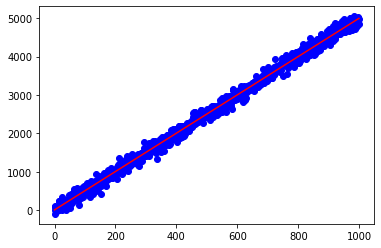

Curve fit was able to calculate a best fit m = ( 4.987 ± 0.011 ), b = ( 11.037 ± 6.259 )
Curve Fit was NOT able to determine the true slope within fit uncertainty.
Curve Fit was able to determine the true y-intercept within fit uncertainty.


In [3]:
from numpy.random import normal
from matplotlib import pyplot
from scipy.optimize import curve_fit
from math import sqrt

#Define a linear function
def linear_fxn(x, m, b):
	return m*x + b

#Define true values
m_true = 5
b_true = 5

#Pick sample domain
domain = range(0,1000)

#Generate sample data
y_scat = [linear_fxn(i, m_true, b_true)-normal(0,100) for i in domain]
x_scat = domain

#Use Curve Fit to find a best fit and uncertainty for the slope and y-intercept
popt, pcov = curve_fit(linear_fxn, x_scat, y_scat)
m_fit = popt[0]
b_fit = popt[1]
m_error = sqrt(pcov[0,0])
b_error = sqrt(pcov[1,1])

#plot the scatter data and best fit line
x = list(domain)
y = [linear_fxn(i,m_fit,b_fit) for i in x]

pyplot.scatter(x_scat, y_scat, color = "blue")
pyplot.plot(x, y, color="red", label = "Best linear fit")
pyplot.show()

print("Curve fit was able to calculate a best fit m = ( {} ± {} ), b = ( {} ± {} )".format(round(m_fit,3),round(m_error,3),round(b_fit,3),round(b_error,3)))

if m_fit + m_error >= m_true and m_fit - m_error <= m_true:
	print("Curve Fit was able to determine the true slope within fit uncertainty.")
else:
	print("Curve Fit was NOT able to determine the true slope within fit uncertainty.")
if b_fit + b_error >= b_true and b_fit - b_error <= b_true:
	print("Curve Fit was able to determine the true y-intercept within fit uncertainty.")
else:
	print("Curve Fit was NOT able to determine the true y-intercept within fit uncertainty.")

